In [128]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
data_file = "../../evolutionary-poker/output/run/lineage_history/lineage_history.csv"

data = pd.read_csv(data_file)

initial_population = data[data['generation'] == 'generation_-1']
initial_population



,lineage,generation,id,fitness,lineage_fitness,lineage_avg_fitness,rounds_lasted,table_position,trait_aggressiveness,trait_risk_tolerance,trait_bluff_tendency,trait_adaptability,trait_position_awareness,trait_chip_size_awareness,action_fold,action_check,action_call,action_raise,action_all_in,action_bluff
0,66834a7d-207,generation_-1,261de4c2,0.0,0.0,0.0,0,NaN,0.87,0.05,0.94,0.81,0.52,0.81,0,0,0,0,0,0
2,380791b6-1ec,generation_-1,6e87e23d,0.0,0.0,0.0,0,NaN,0.62,0.84,0.30,0.04,0.04,0.17,0,0,0,0,0,0
4,70d64a57-917,generation_-1,c8ab54ed,0.0,0.0,0.0,0,NaN,0.76,0.43,0.76,0.04,0.98,0.14,0,0,0,0,0,0
6,8cc8602a-7ba,generation_-1,7550ada3,0.0,0.0,0.0,0,NaN,0.26,0.63,0.69,0.97,0.18,0.24,0,0,0,0,0,0
8,4ed61464-4c3,generation_-1,a4156ad2,0.0,0.0,0.0,0,NaN,0.58,0.39,0.91,0.79,0.09,0.74,0,0,0,0,0,0
16,908d07f0-94f,generation_-1,2f7fcf9e,0.0,0.0,0.0,0,NaN,0.30,0.20,0.68,0.21,0.75,0.98,0,0,0,0,0,0
18,64592765-9e5,generation_-1,56679462,0.0,0.0,0.0,0,NaN,0.25,0.65,0.41,0.04,0.38,0.42,0,0,0,0,0,0
20,dedbdfa0-a65,generation_-1,d6535e25,0.0,0.0,0.0,0,NaN,0.03,0.02,0.14,0.91,0.62,0.15,0,0,0,0,0,0
22,882aa81d-65d,generation_-1,f54caaa2,0.0,0.0,0.0,0,NaN,0.48,0.46,0.62,0.27,0.86,0.56,0,0,0,0,0,0
24,2b352360-012,generation_-1,5950ebc5,0.0,0.0,0.0,0,NaN,0.93,0.94,0.53,0.56,0.44,0.18,0,0,0,0,0,0


In [129]:
# Parameters
initial_population = data[data['generation'] == 'generation_0']

# Parameters
current_lineages = {}
lineage_counter = 0
max_generation = data['generation'].str.extract(r'(-?\d+)').astype(int).max()[0]


In [130]:
for _, row in initial_population.iterrows():
    lineage_id = row['lineage']
    node_id = f"{lineage_id}_G0"
    G.add_node(node_id, lineage=lineage_id, generation=0, family_size=1, mutation=False)
    current_lineages[lineage_id] = node_id
    

In [131]:
for gen in range(1, max_generation + 1):
    next_lineages = {}
    gen_data = data[data['generation'] == f'generation_{gen}']

    for lineage_id, group in gen_data.groupby('lineage'):
        parent_node = current_lineages.get(lineage_id)
        if parent_node is None:
            continue

        node_id = f"{lineage_id}_G{gen}"
        family_size = len(group)

        if not G.has_node(node_id):
            G.add_node(node_id, lineage=lineage_id, generation=gen, family_size=family_size, mutation=False)

        # Avoid self-loop by checking generation difference
        if G.nodes[parent_node]['generation'] != gen:
            G.add_edge(parent_node, node_id)

        next_lineages[lineage_id] = node_id

    current_lineages = next_lineages

In [132]:
self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)

In [133]:
nodes_to_remove = [n for n, d in G.nodes(data=True) if d['generation'] == -1]
G.remove_nodes_from(nodes_to_remove)

/var/folders/nq/mqys_h3n0z1clrnlkq60rks00000gn/T/ipykernel_8348/456548748.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


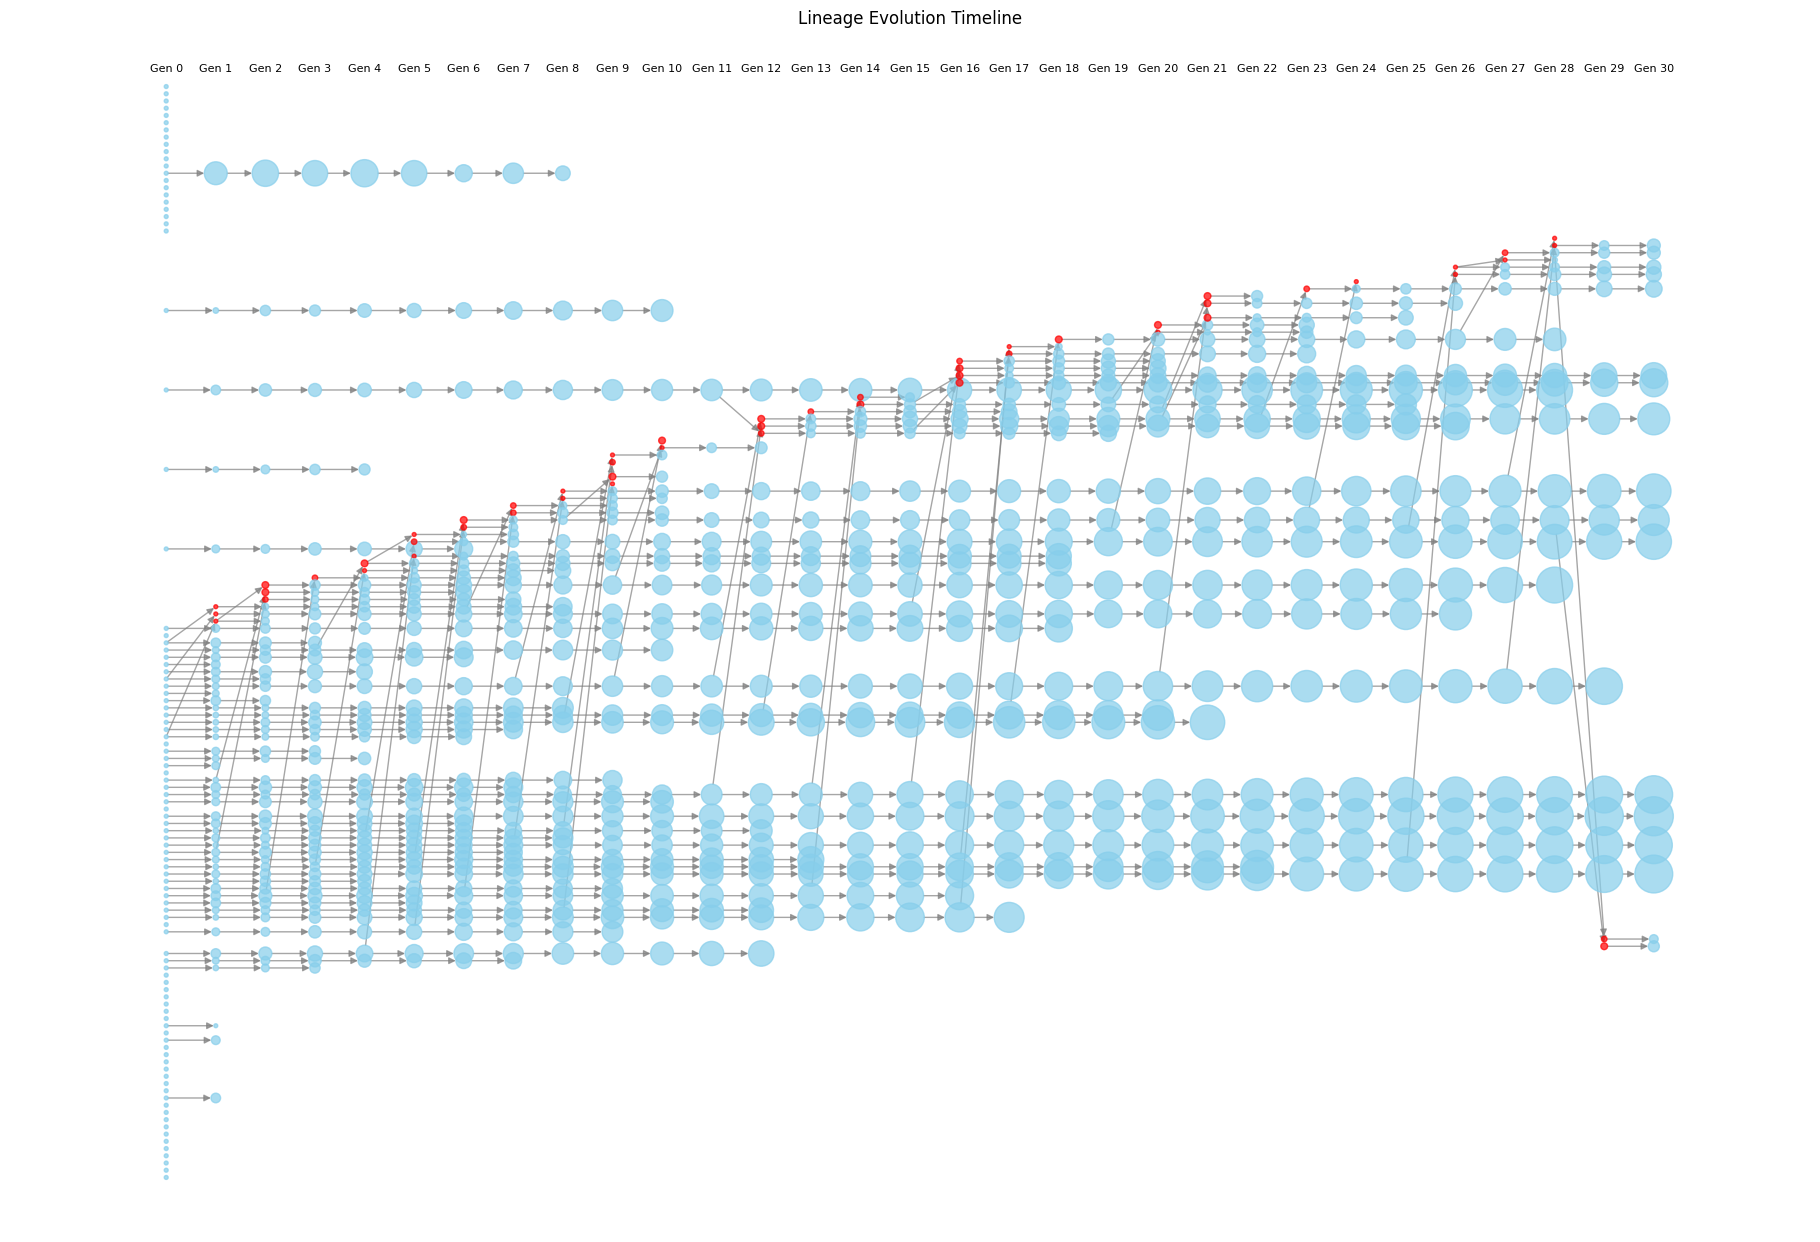

In [134]:
pos = {}
lineage_to_y = {lineage: idx for idx, lineage in enumerate(sorted(set(nx.get_node_attributes(G, 'lineage').values())))}

for node, data in G.nodes(data=True):
    lineage = data['lineage']
    generation = data['generation']
    pos[node] = (generation, lineage_to_y[lineage])

# Draw the graph
plt.figure(figsize=(18, 12))
node_sizes = [G.nodes[n]['family_size'] * 8 for n in G.nodes]
node_colors = ['red' if G.nodes[n]['mutation'] else 'skyblue' for n in G.nodes]

nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=node_colors, edge_color='gray', alpha=0.7)

# Add generation labels to the top of each column
generations = sorted(set([d['generation'] for _, d in G.nodes(data=True)]))
x_ticks = generations
plt.xticks(x_ticks)
for gen in generations:
    plt.text(gen, max(lineage_to_y.values()) + 2, f"Gen {gen}", ha='center', fontsize=8, color='black')

plt.title("Lineage Evolution Timeline")
plt.xlabel("Generation")
plt.ylabel("Lineage ID (approx)")
plt.grid(True)
plt.tight_layout()
plt.show()
